In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
#from sklearn.decomposition import AutoEncoder
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("train_data.csv")

In [4]:
df.head()

,id,ahead_total,ahead_b,ahead_west,ahead_a,ahead_local,ahead_hk,ahead_price,realtime_total,realtime_b,realtime_west,realtime_a,realtime_local,realtime_hk,realtime_price,time_stamp,create_time
0,1,64050,32528,14818,13176,4793,-1265,707.0,62438.0,29049.0,15232.0,14068.0,5400,-1310,559.0,2021/11/1 0:00:00,2024/6/11 16:59:21
1,2,64720,33910,14450,12874,4751,-1265,751.0,63188.0,31357.0,14123.0,13555.0,5353,-1199,750.0,2021/11/1 0:15:00,2024/6/11 16:59:21
2,3,64120,34713,13977,11950,4745,-1265,756.0,62559.0,31783.0,13788.0,12888.0,5311,-1211,731.0,2021/11/1 0:30:00,2024/6/11 16:59:21
3,4,63290,34674,13803,11340,4738,-1265,761.0,61778.0,31135.0,13882.0,12741.0,5231,-1211,681.0,2021/11/1 0:45:00,2024/6/11 16:59:21
4,5,62550,34456,13598,11032,4729,-1265,761.0,61068.0,31150.0,13404.0,12659.0,5178,-1324,681.0,2021/11/1 1:00:00,2024/6/11 16:59:21


In [5]:
data=np.array(df["realtime_price"])

In [6]:
day_data=np.array(np.array_split(data,len(data)/96))

In [7]:
day_data.shape

(960, 96)

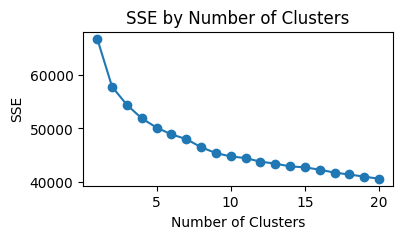

In [8]:
#确定最佳聚类点
scaler = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0)
X = scaler.fit_transform(day_data)
X = X.reshape(-1,X.shape[1])

max_clusters = 20
sse = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_属性存储了SSE
    

plt.figure(figsize=(4,2))
plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.title('SSE by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.savefig("sse.pdf")

In [9]:
#kmeans
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers=kmeans.cluster_centers_

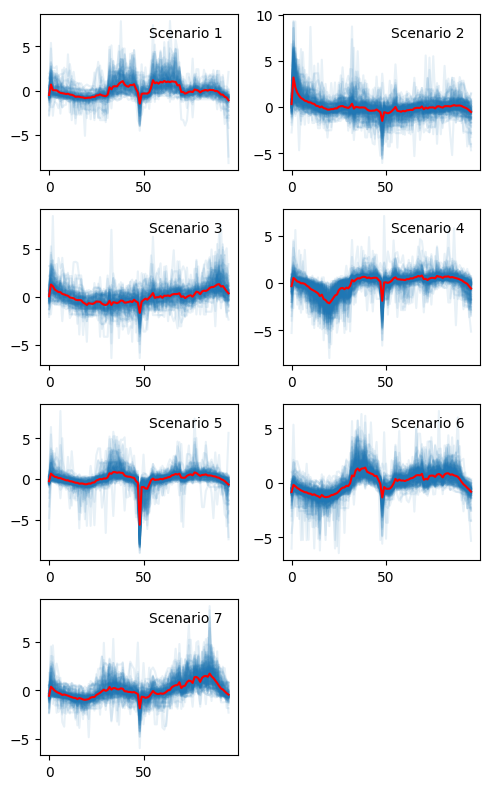

In [26]:
plt.figure(figsize=(5,8))
for yi in range(7):
    plt.subplot(4, 2, yi+1)
    cluster_indices = np.where(labels == yi)[0]
    plt.plot(X[cluster_indices, :].T, "#1f77b4",alpha=0.1)
    plt.plot(cluster_centers[yi].ravel(), "r-")
    
    #plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Scenario %d' % (yi + 1),
             transform=plt.gca().transAxes)
    # if yi == 1:
    #     plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.savefig("result.pdf")
plt.show()

In [28]:
X.shape

(960, 96)

In [31]:
labels=labels.reshape(-1,1)

In [32]:
#Saving
np.save("label",labels)
np.save("data",X)